In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load the dataset
file_path = "Dataset.xlsx" 
df = pd.read_excel(file_path)

In [4]:
print(df.head())

# Check basic info
print("\nDataset Info:")
print(df.info())

# Checking missing values
print("\nMissing Values Per Column:")
print(df.isnull().sum())

  Visualization Memory Association Reasoning   Age              Activity name  \
0            No     No          No       Yes  5-13            Math Challenges   
1            No    Yes          No        No  5-13            Mystery Stories   
2            No     No          No       Yes  5-13            Mystery Stories   
3            No    Yes          No        No  5-13  Pattern Recognition Games   
4            No     No          No       Yes  5-13  Pattern Recognition Games   

                                Activity description    Zone           Time  
0  Engage children with math riddles and mental c...   Green  15-20 minutes  
1  Read or tell a mystery story that requires chi...  Yellow  20-25 minutes  
2  Dive into a mystery story where children must ...   Green  20-25 minutes  
3  Challenge children with a series of patterns t...  Yellow  15-20 minutes  
4  Show a series of progressively challenging pat...   Green  15-20 minutes  

Dataset Info:
<class 'pandas.core.frame.Data

In [5]:
# Convert Zone column to lowercase for consistency
df['Zone'] = df['Zone'].str.lower()

# Ensure the zone column only contains valid values
valid_zones = {'red', 'yellow', 'green'}
df = df[df['Zone'].isin(valid_zones)]


In [7]:
df['Age'] = df['Age'].astype(str).str.replace(r'[^0-9+-]', '', regex=True)  # Keep only numbers and '-'
df['Age'] = df['Age'].replace({'64+': '64-100'})  # Convert "64+" to "64-100"


In [9]:
# Convert Time to numerical range (taking average time)
df[['Time Min', 'Time Max']] = df['Time'].str.extract(r'(\d+)-(\d+)').astype(float)
df['Time'] = df[['Time Min', 'Time Max']].mean(axis=1)  # Taking average
df.drop(columns=['Time Min', 'Time Max'], inplace=True)

In [10]:
# Check cleaned dataset
print("\nCleaned Dataset Preview:")
print(df.head())



Cleaned Dataset Preview:
  Visualization Memory Association Reasoning   Age              Activity name  \
0            No     No          No       Yes  5-13            Math Challenges   
1            No    Yes          No        No  5-13            Mystery Stories   
2            No     No          No       Yes  5-13            Mystery Stories   
3            No    Yes          No        No  5-13  Pattern Recognition Games   
4            No     No          No       Yes  5-13  Pattern Recognition Games   

                                Activity description    Zone  Time  
0  Engage children with math riddles and mental c...   green  17.5  
1  Read or tell a mystery story that requires chi...  yellow  22.5  
2  Dive into a mystery story where children must ...   green  22.5  
3  Challenge children with a series of patterns t...  yellow  17.5  
4  Show a series of progressively challenging pat...   green  17.5  


In [11]:
df.to_csv("cleaned_cognitive_activities.csv", index=False)

C:\Users\shraw\AppData\Local\Temp\ipykernel_6632\3293897167.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Zone', data=df, palette='viridis')


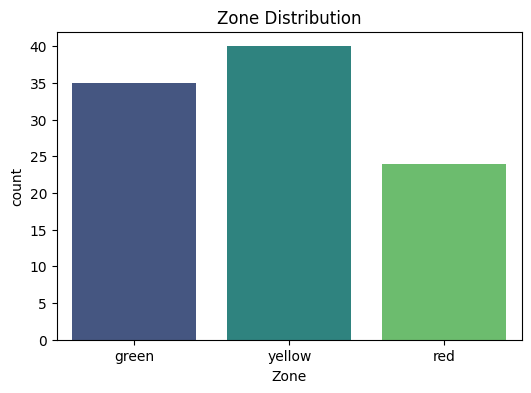

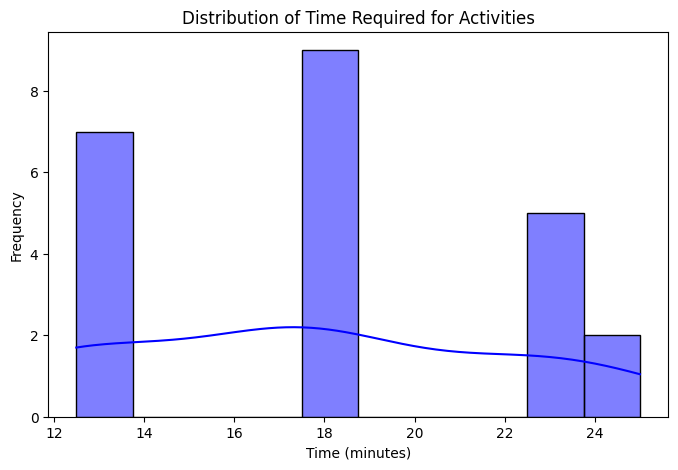

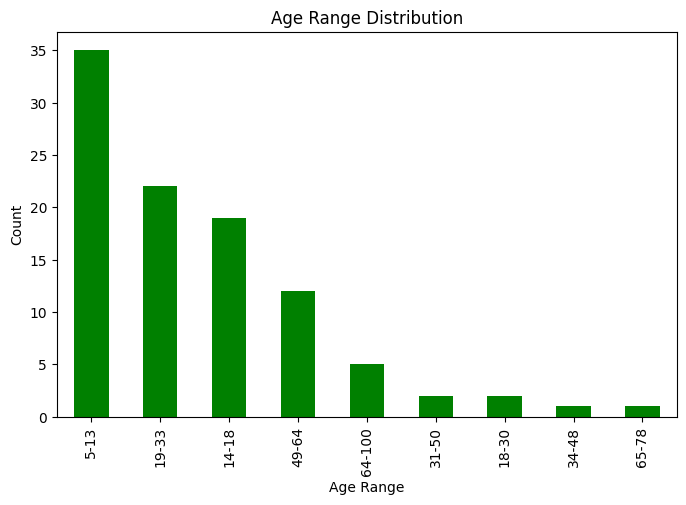

In [14]:
# Zone Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Zone', data=df, palette='viridis')
plt.title('Zone Distribution')
plt.show()

# Time Required Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Time'], bins=10, kde=True, color='blue')
plt.xlabel('Time (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Time Required for Activities')
plt.show()

# Age Range Distribution
plt.figure(figsize=(8,5))
df['Age'].value_counts().plot(kind='bar', color='green')
plt.title('Age Range Distribution')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.show()


In [ ]:
# Extract materials required from the activity description
def extract_materials(description):
    words = description.lower().split()
    materials = [word for word in words if word in ['cards', 'pen', 'paper', 'puzzle', 'blocks', 'board', 'dice']]
    return ', '.join(set(materials)) if materials else 'None'

df['Materials Required'] = df['Activity Description'].apply(extract_materials)

# Generate Objective from Yes/No Columns
def generate_objective(row):
    objectives = []
    if row['Memory'] == 'Yes':
        objectives.append('Improve Memory')
    if row['Reasoning'] == 'Yes':
        objectives.append('Enhance Logical Thinking')
    if row['Association Reasoning'] == 'Yes':
        objectives.append('Develop Associative Reasoning')

    return ', '.join(objectives) if objectives else 'General Cognitive Exercise'

In [8]:
import pandas as pd
import numpy as np

# Load the dataset
df2= pd.read_csv("cleaned_cognitive_activities.csv")

# Identify Yes/No category columns
category_columns = ["Memory", "Reasoning", "Association", "Reasoning"]

# Convert Yes/No columns into a readable skills description
def get_skills(row):
    skills = []
    for col in category_columns:
        if row[col] == "Yes":
            skills.append(col)
    return ", ".join(skills) if skills else "General Cognitive Skills"

df2['cognitive_skills'] = df2.apply(get_skills, axis=1)

# Generate Activity Name (Placeholder: Use cognitive skills)
df2['name'] = df2['cognitive_skills'] + " Challenge"

# Generate Description (Basic Template)
df2['description'] = "An engaging cognitive activity focused on " + df2['cognitive_skills'].fillna("multiple skills") + "."

# Generate Instructions (Basic Structure)
df2['instructions'] = "Step 1: Read the instructions carefully.\nStep 2: Follow the steps based on " + df2['cognitive_skills'].fillna("various cognitive skills") + ".\nStep 3: Complete the task and analyze your performance."

# Extract Materials from Description (Basic Keyword Matching)
def extract_materials(description):
    possible_materials = ["cards", "pen", "paper", "puzzle", "blocks", "board", "dice"]
    found_materials = [word for word in possible_materials if word in description.lower()]
    return ", ".join(found_materials) if found_materials else "None"

df2['materials_required'] = df2['description'].apply(extract_materials)

# Assign Random Time Required (12-20 min)
df2['time_required'] = df2.apply(lambda x: str(np.random.randint(12, 20)) + " minutes", axis=1)

# Assign Zone (Use provided values if available)
df2['zone'] = df2['Zone'].fillna("yellow")  # Default to "yellow" if missing

# Generate Objective (Based on Cognitive Skills)
def generate_objective(skills):
    skill_to_objective = {
        "Memory": "Improve memory retention and recall.",
        "Reasoning": "Enhance logical thinking and problem-solving.",
        "Association Reasoning": "Develop pattern recognition and associative skills."
    }
    
    objectives = [skill_to_objective[skill] for skill in skills.split(", ") if skill in skill_to_objective]
    return ", ".join(objectives) if objectives else "General cognitive improvement."

df2['objective'] = df2['cognitive_skills'].apply(generate_objective)

# Select and save the final dataset
final_columns = ["name", "description", "instructions", "materials_required", "time_required", "zone", "objective", "cognitive_skills"]
df_final = df2[final_columns]
df_final.to_json("structured_activity_dataset.json", orient="records", lines=True)

print("✅ Dataset is ready! Saved as 'structured_activity_dataset.json'.")


✅ Dataset is ready! Saved as 'structured_activity_dataset.json'.


In [3]:
from transformers import T5Tokenizer, T5ForConditionalGeneration
import torch

model_path = "./activity_generator_model"  # Ensure this path is correct
tokenizer = T5Tokenizer.from_pretrained(model_path)
model = T5ForConditionalGeneration.from_pretrained(model_path)

prompt = "Generate an activity for Cognitive Skills: Memory, Zone: green"
inputs = tokenizer(prompt, return_tensors="pt", padding=True, truncation=True, max_length=256)

with torch.no_grad():
    output_ids = model.generate(**inputs, max_length=512, num_return_sequences=1)

generated_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)

print("🔹 Model Output:", generated_text)


🔹 Model Output: 
